<a href="https://colab.research.google.com/github/vsnupoudel/CourseAssignment/blob/master/EDA_Ds_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
!pip install gensim==4.0.0

In [23]:
!pip uninstall numpy
!pip install numpy

Found existing installation: numpy 1.19.5
Uninstalling numpy-1.19.5:
  Would remove:
    /usr/bin/f2py
    /usr/local/bin/f2py
    /usr/local/bin/f2py3
    /usr/local/bin/f2py3.7
    /usr/local/lib/python3.7/dist-packages/numpy-1.19.5.dist-info/*
    /usr/local/lib/python3.7/dist-packages/numpy.libs/libgfortran-2e0d59d6.so.5.0.0
    /usr/local/lib/python3.7/dist-packages/numpy.libs/libopenblasp-r0-09e95953.3.13.so
    /usr/local/lib/python3.7/dist-packages/numpy.libs/libquadmath-2d0c479f.so.0.0.0
    /usr/local/lib/python3.7/dist-packages/numpy.libs/libz-eb09ad1d.so.1.2.3
    /usr/local/lib/python3.7/dist-packages/numpy/*
Proceed (y/n)? y
  Successfully uninstalled numpy-1.19.5
     |████████████████████████████████| 15.7 MB 183 kB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.6.0 requires numpy~=1.19.2, but you have numpy 1.21.2 which is inco

## Loading and preprocessing the data
Direct download from Google Drive. 

In [1]:
!gdown --id 18dan1-qtEG-9NXF1nIw1il79gp77lB9a -O Data.zip

Downloading...
From: https://drive.google.com/uc?id=18dan1-qtEG-9NXF1nIw1il79gp77lB9a
To: /content/Data.zip
4.52MB [00:00, 30.2MB/s]


In [2]:
!unzip -o -q /content/Data.zip -d /content/data/  

In [1]:
INPUTS_DIR = '/content/data/Document_Dataset/inputs' # test set has some images from training, removing them below
TEMPLATES_DIR = '/content/data/Document_Dataset/templates'

In [ ]:
os.listdir(INPUTS_DIR)

In [6]:
import os
for test_file in os.listdir(INPUTS_DIR):
  if test_file in os.listdir(TEMPLATES_DIR):
    os.remove(INPUTS_DIR+'/'+test_file)

In [7]:
 os.listdir(INPUTS_DIR)

['document-016-122390.in.000.png',
 'document-006-118355.in.000.png',
 'document-000-114769.out.000.png',
 'document-010-112672.in.000.png',
 'document-002-113892.out.000.png',
 'document-000-100647.out.000.png',
 'document-009-116437.in.000.png',
 'document-000-113660.in.000.png',
 'document-003-123852.in.000.png',
 'document-006-112339.out.000.png',
 'document-010-120946.in.000.png',
 'document-001-113309.out.000.png',
 'document-003-114330.in.000.png',
 'document-011-111771.in.000.png',
 'document-002-113472.in.000.png',
 'document-003-115719.out.000.png',
 'document-018-125441.in.000.png',
 'document-003-119418.out.000.png',
 'document-004-118185.out.000.png',
 'document-005-114610.in.000.png',
 'document-007-111364.out.000.png',
 'document-020-125717.out.000.png',
 'document-002-115633.in.000.png']

# Will attempt two methods
## Use algorithms that detect similarity of images
1. Crop the heading part of images 
2. Find a pretrained feature vector online on tfhub.dev or other sources.Take
3. Run these pretrained feature vectors on all the templates ( training data) , and store them.
4. Take any input from the input folder ( test set), get its feature vectors.
5. Using distance metric like Euclidean, Manhattan to find which image in template is nearest to the Input

## Use Doc2vec algorithm after extracting text using OCR API.
1. Two documents which have the most similar Doc2Vec embeddings are the same documents

# Trying the second algorithm, as it seems to do a better job from what I know for documents.
## However, if the heading part is always similar, just the first method might be optimal.


## Storing documents' names in a dictionary, leaving their embeddings as None for now

In [2]:
import os
length, filenames  = len( os.listdir(TEMPLATES_DIR) ) , os.listdir(TEMPLATES_DIR) 

In [3]:
template_store = { key: { } for key in  filenames}      
template_store

{'document-000-113188.in.000.png': {},
 'document-000-113660.out.000.png': {},
 'document-000-118454.out.000.png': {},
 'document-000-123542.out.000.png': {},
 'document-001-110866.in.000.png': {},
 'document-001-113309.in.000.png': {},
 'document-001-113760.in.000.png': {},
 'document-001-114898.in.000.png': {},
 'document-001-115484.out.000.png': {},
 'document-001-118758.in.000.png': {},
 'document-001-123663.in.000.png': {},
 'document-002-110935.in.000.png': {},
 'document-002-114195.out.000.png': {},
 'document-003-112107.out.000.png': {},
 'document-004-112180.in.000.png': {},
 'document-004-114466.out.000.png': {},
 'document-004-115864.out.000.png': {},
 'document-005-118279.in.000.png': {},
 'document-006-101162.in.000.png': {},
 'document-006-118355.out.000.png': {}}

## Use OCR API to get text from Images
- Let us explore some of the images first

In [4]:
from PIL import Image  
import numpy as np
img_pil= Image.open(TEMPLATES_DIR+'/document-000-113188.in.000.png') 
import cv2
img_cv = cv2.imread(TEMPLATES_DIR+'/document-000-113188.in.000.png'
        )[: ,: , 0] #images are binary already, so taking the R channel only
img_cv

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [5]:
np.unique( img_cv ), img_cv.shape

(array([  0, 255], dtype=uint8), (3508, 2479))

## Just defining some useful functions

In [6]:
# get grayscale image
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# noise removal
def remove_noise(image):
    return cv2.medianBlur(image,5)
 
#thresholding
def thresholding(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

#dilation
def dilate(image):
    kernel = np.ones((3,3),np.uint8)
    return cv2.dilate(image, kernel, iterations = 1)
    
#erosion
def erode(image):
    kernel = np.ones((3,3),np.uint8)
    return cv2.erode(image, kernel, iterations = 1)

## Plotting with erosion (increases text thickness) and dilation (reduces thickness)

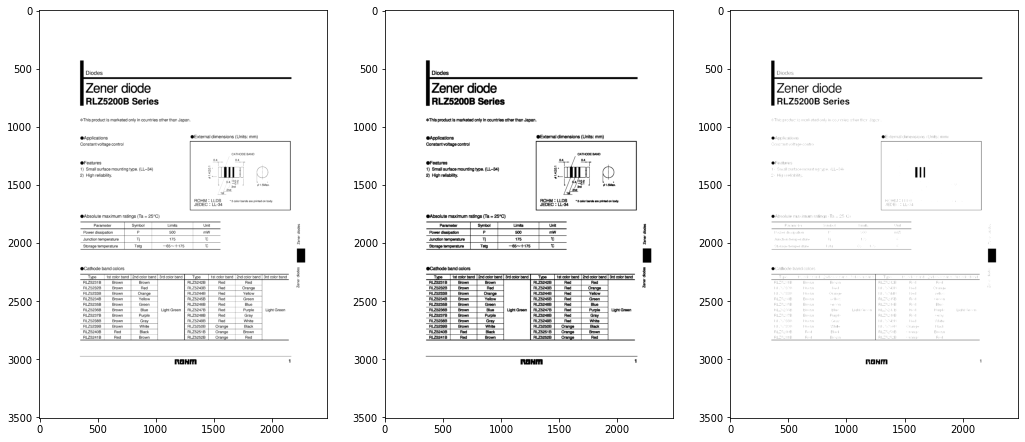

In [7]:
import matplotlib.pyplot as plt
fig, (ax1, ax2, ax3) = plt.subplots(1, 3 
                        , figsize=(img_cv.shape[0]/200, img_cv.shape[1]/200 ))
ax1.imshow( img_cv  ,cmap='gray')
ax2.imshow( erode(img_cv)  ,cmap='gray')
ax3.imshow( dilate(img_cv)  ,cmap='gray')
plt.show()

## Observation:
**The original image looks fine for OCR in this case** 
- Could try eroding with 3,3 filter later

In [8]:
# pip install --upgrade google-cloud-vision

In [9]:
!curl -H "apikey:141a09305188957" --form "file=@document-000-113188.in.000.png" --form "language=eng" --form "isOverlayRequired=true" https://api.ocr.space/Parse/Image

curl: (26) read function returned funny value


## Try with the Python API

In [10]:
import requests
def ocr_space( filename,overlay = True
              ,api_key = '141a09305188957', language = 'eng'):

  payload = {
      'isOverlayRequired' : overlay,
      'apikey': api_key,
      'language': language,
  }

  with open(filename, 'rb') as f:
    r = requests.post('https://api.ocr.space/parse/image',
                      files = {filename : f},
                      data = payload,
                      )
    return r.content.decode()

In [11]:
import json
# json_output = json.loads( ocr_space(TEMPLATES_DIR+'/document-000-113188.in.000.png', overlay= False))
# /content/data/Document_Dataset/templates/document-000-113188.in.000.png

In [12]:
list_of_documents = {}
for k in template_store.keys():
  json_output = json.loads( ocr_space(TEMPLATES_DIR+'/'+k
                    , overlay= False))
  document = json_output['ParsedResults'][0]['ParsedText']
  list_doc = document.split(' ')
  # print(list_doc)
  list_of_documents[k] = list_doc
  # with open( k+'.txt', "w") as text_file:
  #   text_file.write(document)
print(list_of_documents)

{'document-000-118454.out.000.png': ['CLL4729A\r\nTHRU\r\nCLL4764A\r\nI.ow', 'ZENER', 'DIODE\r\n5%', 'TOLERANCE\r\nMELF', 'CASE\r\nABSOLUTE', 'MAXIMUM', 'RATINGS\r\nPower', 'Dissipation\r\nOperating', 'and', 'Storage', 'Temperature\r\nCe', 'nt', 'ral\r\nSemiconductor', 'Corp.\r\nDESCRIPTION:\r\nThe', 'CENTRAL', 'SEMICONDUCTOR', 'CLL4729A\r\nSeries', 'Silicon', 'Zener', 'Diode', 'is', 'a', 'high', 'quality', 'voltage\r\nregulator', 'for', 'use', 'in', 'surface', 'mount', 'industrial,\r\ncommercial,', 'entertainment', 'and', 'computer\r\napplications.\r\nMarking', 'Code:', 'Cathode', 'Band\r\nSYMBOL\r\n-65', 'to', '+200\r\nELECTRICAL', 'CHARACTERISTICS', '(TA=250C),', 'VF=I', '.2MAX', '@', 'IF', '=', '200mA', 'FOR', 'ALL', 'TYPES.\r\nZENER\r\nTEST.\r\nTYPE:', 'NO.\r\nCLL4729A\r\nCLL4730A\r\nCLL4731A\r\nCLL4732A\r\nCLL4733A\r\nCLL4734A\r\nCLL4735A\r\nCLL4736A\r\nCLL4737A\r\nCLL4738A\r\nCLL4739A\r\nCLL4740A\r\nCLL4741A\r\nCLL4742A\r\nCLL4743A\r\nCLL4744A\r\nCLL4745A\r\nCLL4746A\r\nCLL4747A

In [13]:
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

/usr/local/lib/python3.7/dist-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [14]:
!python --version

Python 3.7.11


In [15]:
import gensim
gensim.__version__

'4.0.0'

In [16]:
Doc2Vec()

In [17]:
list_of_documents

{'document-000-113188.in.000.png': ['Diodes\r\nZener',
  'diode\r\nRLZ5200B',
  'Series\r\n*This',
  'product',
  'is',
  'marketed',
  'only',
  'in',
  'countries',
  'other',
  'than',
  'Japan.\r\nROHM',
  ':',
  "LLDS\r\n'Applications\r\nConstant",
  'voltage',
  "control\r\n'Features\r\n1)",
  'Small',
  'surface',
  'mounting',
  'type.',
  "(LL—34)\r\n'External",
  'dimensions',
  '(Units:',
  'mm)\r\n2)',
  'High',
  "reliability.\r\n'Absolute",
  'maximum',
  'ratings',
  '(Ta\r\n0.4\r\n+1\r\nJEDEC',
  ':\r\n1st\r\nCATHODE',
  'BAND\r\n0.4\r\n—0.1\r\n1.5Max.\r\n3rd\r\n2nd\r\n*',
  '3',
  'color',
  'bands',
  'are',
  'printed',
  'on',
  'body.\r\n=',
  '250C)\r\nParameter\r\nPower',
  'dissipation\r\nJunction',
  'temperature\r\nStorage',
  "temperature\r\n'Cathode",
  'band',
  'colors\r\nType\r\n1st',
  'color',
  'band\r\nRLZ5231B\r\nRLZ5232B\r\nRLZ5233B\r\nRLZ5234B\r\nRLZ5235B\r\nRLZ5236B\r\nRLZ5237B\r\nRLZ5238B\r\nRLZ5239B\r\nRLZ5240B\r\nRLZ5241B\r\nBrown\r\nBrown\r\nB

## Generating Tags for each document

In [ ]:
tags_dict = {'document-000-118454.out.000.png' : ['Central Semiconductor', 1]
, 'document-001-110866.in.000.png' : ['Micro Commercial Components',2]
, 'document-005-118279.in.000.png' : ['ROHM', 'UMZ12N' , 0.2]
, 'document-004-115864.out.000.png'
, 'document-001-114898.in.000.png', 'document-004-112180.in.000.png', 'document-006-118355.out.000.png', 'document-004-114466.out.000.png', 'document-002-114195.out.000.png', 'document-000-123542.out.000.png', 'document-001-115484.out.000.png', 'document-006-101162.in.000.png', 'document-001-113760.in.000.png', 'document-000-113188.in.000.png', 'document-001-123663.in.000.png', 'document-003-112107.out.000.png'
, 'document-001-118758.in.000.png', 'document-001-113309.in.000.png', 'document-002-110935.in.000.png', 'document-000-113660.out.000.png'}

In [18]:
list_of_documents.keys()

dict_keys(['document-000-118454.out.000.png', 'document-001-110866.in.000.png', 'document-005-118279.in.000.png', 'document-004-115864.out.000.png', 'document-001-114898.in.000.png', 'document-004-112180.in.000.png', 'document-006-118355.out.000.png', 'document-004-114466.out.000.png', 'document-002-114195.out.000.png', 'document-000-123542.out.000.png', 'document-001-115484.out.000.png', 'document-006-101162.in.000.png', 'document-001-113760.in.000.png', 'document-000-113188.in.000.png', 'document-001-123663.in.000.png', 'document-003-112107.out.000.png', 'document-001-118758.in.000.png', 'document-001-113309.in.000.png', 'document-002-110935.in.000.png', 'document-000-113660.out.000.png'])

In [18]:
import os
# txt_list = [ x for x in os.listdir('/content/') if '.txt' in x]
# documents = [ TaggedDocument(doc, [i]) for i, doc in enumerate( txt_list ) ]
# documents
documents = [ TaggedDocument(doc, [i]) for i, doc in enumerate( list_of_documents.values() ) ]
documents

[TaggedDocument(words=['CLL4729A\r\nTHRU\r\nCLL4764A\r\nI.ow', 'ZENER', 'DIODE\r\n5%', 'TOLERANCE\r\nMELF', 'CASE\r\nABSOLUTE', 'MAXIMUM', 'RATINGS\r\nPower', 'Dissipation\r\nOperating', 'and', 'Storage', 'Temperature\r\nCe', 'nt', 'ral\r\nSemiconductor', 'Corp.\r\nDESCRIPTION:\r\nThe', 'CENTRAL', 'SEMICONDUCTOR', 'CLL4729A\r\nSeries', 'Silicon', 'Zener', 'Diode', 'is', 'a', 'high', 'quality', 'voltage\r\nregulator', 'for', 'use', 'in', 'surface', 'mount', 'industrial,\r\ncommercial,', 'entertainment', 'and', 'computer\r\napplications.\r\nMarking', 'Code:', 'Cathode', 'Band\r\nSYMBOL\r\n-65', 'to', '+200\r\nELECTRICAL', 'CHARACTERISTICS', '(TA=250C),', 'VF=I', '.2MAX', '@', 'IF', '=', '200mA', 'FOR', 'ALL', 'TYPES.\r\nZENER\r\nTEST.\r\nTYPE:', 'NO.\r\nCLL4729A\r\nCLL4730A\r\nCLL4731A\r\nCLL4732A\r\nCLL4733A\r\nCLL4734A\r\nCLL4735A\r\nCLL4736A\r\nCLL4737A\r\nCLL4738A\r\nCLL4739A\r\nCLL4740A\r\nCLL4741A\r\nCLL4742A\r\nCLL4743A\r\nCLL4744A\r\nCLL4745A\r\nCLL4746A\r\nCLL4747A\r\nCLL4748A\r

In [19]:
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [21]:
model = Doc2Vec(documents,
                vector_size=500  # size of output embedding
                 , window = 4    # max continuos words to consider
                , min_count=1    # minimum number of words that are valid
                , workers=4
                , epochs=500)

2021-09-04 15:34:41,950 : INFO : collecting all words and their counts
2021-09-04 15:34:41,953 : INFO : PROGRESS: at example #0, processed 0 words (0/s), 0 word types, 0 tags
2021-09-04 15:34:41,957 : INFO : collected 1278 word types and 20 unique tags from a corpus of 20 examples and 2225 words
2021-09-04 15:34:41,961 : INFO : Creating a fresh vocabulary
2021-09-04 15:34:41,974 : INFO : Doc2Vec lifecycle event {'msg': 'effective_min_count=1 retains 1278 unique words (100.0%% of original 1278, drops 0)', 'datetime': '2021-09-04T15:34:41.974120', 'gensim': '4.0.0', 'python': '3.7.11 (default, Jul  3 2021, 18:01:19) \n[GCC 7.5.0]', 'platform': 'Linux-5.4.104+-x86_64-with-Ubuntu-18.04-bionic', 'event': 'prepare_vocab'}
2021-09-04 15:34:41,976 : INFO : Doc2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 2225 word corpus (100.0%% of original 2225, drops 0)', 'datetime': '2021-09-04T15:34:41.976086', 'gensim': '4.0.0', 'python': '3.7.11 (default, Jul  3 2021, 18:01:19) \n[GCC 7.5.0

In [22]:
model.get_latest_training_loss()

0.0

In [23]:
model.build_vocab(documents)

2021-09-04 15:35:01,755 : INFO : collecting all words and their counts
2021-09-04 15:35:01,759 : INFO : PROGRESS: at example #0, processed 0 words (0/s), 0 word types, 0 tags
2021-09-04 15:35:01,783 : INFO : collected 1278 word types and 20 unique tags from a corpus of 20 examples and 2225 words
2021-09-04 15:35:01,788 : INFO : Creating a fresh vocabulary
2021-09-04 15:35:01,812 : INFO : Doc2Vec lifecycle event {'msg': 'effective_min_count=1 retains 1278 unique words (100.0%% of original 1278, drops 0)', 'datetime': '2021-09-04T15:35:01.812545', 'gensim': '4.0.0', 'python': '3.7.11 (default, Jul  3 2021, 18:01:19) \n[GCC 7.5.0]', 'platform': 'Linux-5.4.104+-x86_64-with-Ubuntu-18.04-bionic', 'event': 'prepare_vocab'}
2021-09-04 15:35:01,814 : INFO : Doc2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 2225 word corpus (100.0%% of original 2225, drops 0)', 'datetime': '2021-09-04T15:35:01.814221', 'gensim': '4.0.0', 'python': '3.7.11 (default, Jul  3 2021, 18:01:19) \n[GCC 7.5.0

In [24]:
model.train(documents,total_examples=model.corpus_count
            , epochs=model.epochs
            )

2021-09-04 15:35:01,887 : WARNING : Effective 'alpha' higher than previous training cycles
2021-09-04 15:35:01,890 : INFO : Doc2Vec lifecycle event {'msg': 'training model with 4 workers on 1278 vocabulary and 500 features, using sg=0 hs=0 sample=0.001 negative=5 window=4', 'datetime': '2021-09-04T15:35:01.890916', 'gensim': '4.0.0', 'python': '3.7.11 (default, Jul  3 2021, 18:01:19) \n[GCC 7.5.0]', 'platform': 'Linux-5.4.104+-x86_64-with-Ubuntu-18.04-bionic', 'event': 'train'}
2021-09-04 15:35:01,898 : INFO : worker thread finished; awaiting finish of 3 more threads
2021-09-04 15:35:01,901 : INFO : worker thread finished; awaiting finish of 2 more threads
2021-09-04 15:35:01,907 : INFO : worker thread finished; awaiting finish of 1 more threads
2021-09-04 15:35:01,921 : INFO : worker thread finished; awaiting finish of 0 more threads
2021-09-04 15:35:01,923 : INFO : EPOCH - 1 : training on 2225 raw words (2056 effective words) took 0.0s, 80134 effective words/s
2021-09-04 15:35:01,931

In [25]:
model.get_latest_training_loss()

0.0

In [26]:
model.save('doc2vec_model_500_5')

2021-09-04 15:35:21,432 : INFO : Doc2Vec lifecycle event {'fname_or_handle': 'doc2vec_model_500_5', 'separately': 'None', 'sep_limit': 10485760, 'ignore': frozenset(), 'datetime': '2021-09-04T15:35:21.432911', 'gensim': '4.0.0', 'python': '3.7.11 (default, Jul  3 2021, 18:01:19) \n[GCC 7.5.0]', 'platform': 'Linux-5.4.104+-x86_64-with-Ubuntu-18.04-bionic', 'event': 'saving'}
2021-09-04 15:35:21,436 : INFO : not storing attribute cum_table
2021-09-04 15:35:21,455 : INFO : saved doc2vec_model_500_5


In [27]:
vectors_train = { doc : model.infer_vector(documents[i][0]).tolist()
 for i, doc in enumerate( list_of_documents.keys() ) }

In [28]:
# import numpy as np
# distances = [ np.linalg.norm(vector-vec) for vec in vectors_train] #L2( Euclidean distance)
# np.argmin(distances)
# this is correct

## Store the document embeddings in corresponding template_store

In [29]:
json_string = json.dumps(vectors_train, indent=4)

In [30]:
# vectors_train
with open('/content/data/vectors_train.json', "w") as outfile: 
    json.dump(vectors_train, outfile)

## Try Sentence Encoder Algorithm